# XAI(Explainable Artificial Intelligence)
> XAI는 설명 가능한 인공지능의 약자로, 인공지능의 행위와 도출한 결과를 사람이 이해할 수 있는 형태로 설명하는 방법론과 분야를 일컫는다.    
> 흔히 인공지능 기술은 복잡한 일련의 과정을 통해 결론을 도출하나, 그 과정을 설명할 수 없는 블랙박스로 여겨진다. XAI는 이에 반하는 개념으로 인공지능의 불확실성을 해소하고 신뢰성을 높이는 역할을 하여, 최근 연구가 활발하게 이루어지는 분야이다.

## SHAP vs SAGE

- SHAP
> how much does each feature contribute to this individual prediction?  
> 각 피쳐들이 개별 예측에 얼마나 기여를 하였는지?
- SAGE
> how much does the model depend on each feature overall?    
> 모델 학습시 각 피쳐들에 얼마나 의존하였는가?

# 데이터 준비

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns

df = sns.load_dataset('titanic')
cols = ["age", "sibsp", "parch", "fare"]
features = df[cols]
target = df["survived"]

인코딩

In [12]:
from sklearn.preprocessing import OneHotEncoder

cols = ["pclass", "sex", "embarked"] #범주형

enc = OneHotEncoder(handle_unknown='ignore')
tmp = pd.DataFrame(
    enc.fit_transform(df[cols]).toarray(),
    columns = enc.get_feature_names_out()
)

features = pd.concat([features, tmp], axis=1)

In [13]:
features.head()

,age,sibsp,parch,fare,pclass_1,pclass_2,pclass_3,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,embarked_nan
0,22.0,1,0,7.2500,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,38.0,1,0,71.2833,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,26.0,0,0,7.9250,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,35.0,1,0,53.1000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,35.0,0,0,8.0500,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


결측치 제거

In [14]:
features.age = features.age.fillna(features.age.median())

데이터 스케일링

In [15]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
features = pd.DataFrame(
    scaler.fit_transform(features),
    columns = features.columns
)

데이터 분리

In [16]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split

random_state=42

X_tr, X_te, y_tr, y_te = train_test_split(
    features, target, test_size=0.20,
    random_state=random_state
)

X_tr.shape, X_te.shape

((712, 13), (179, 13))

# SAGE

학습

In [17]:
from lightgbm import LGBMClassifier, plot_importance
model = LGBMClassifier(random_state = random_state)

In [18]:
from sklearn.metrics import roc_auc_score

pred = model.predict_proba(X_te)[:,1]
roc_auc_score(y_te,pred)

NotFittedError: ignored

NotFittedError: ignored

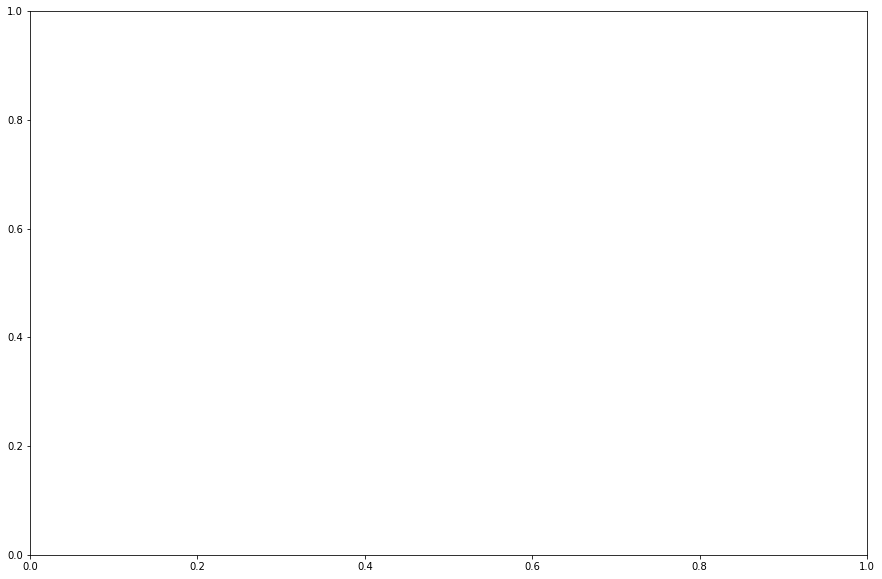

In [8]:
import matplotlib.pyplot as plt

fig, ax  = plt.subplots(figsize = (15,10))
plot_importance(model,ax=ax)
plt.show()